<a href="https://colab.research.google.com/github/computacao-aplicada/lab01-intro-WillTms/blob/main/lab01-intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01: Introdução à Visão Computacional e Computação Gráfica

### 🎯 Objetivos da Aula
- Compreender o que é Visão Computacional.
- Diferenciar Visão Computacional, Processamento de Imagens e Computação Gráfica.
- Realizar manipulações simples com imagens.
- Explorar conceitos de pixels, resoluções e canais de cor.


In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Exibir gráficos inline
%matplotlib inline


## Exemplo prático: Carregar e visualizar uma imagem

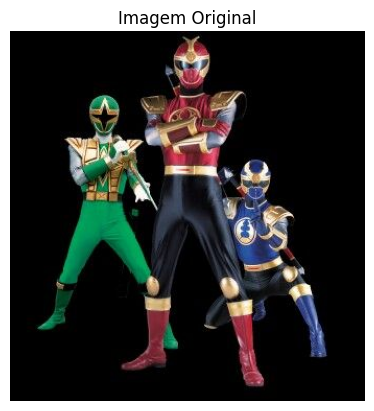

In [ ]:
# Carregar imagem de exemplo
from PIL import Image
import requests

url = "https://i.pinimg.com/736x/a7/71/1a/a7711abcb90b586622f7f59eef774bce.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image = image.convert("RGB")  # Garante 3 canais

# Mostrar imagem
plt.imshow(image)
plt.title("Imagem Original")
plt.axis('off')
plt.show()


## Manipulação dos canais RGB

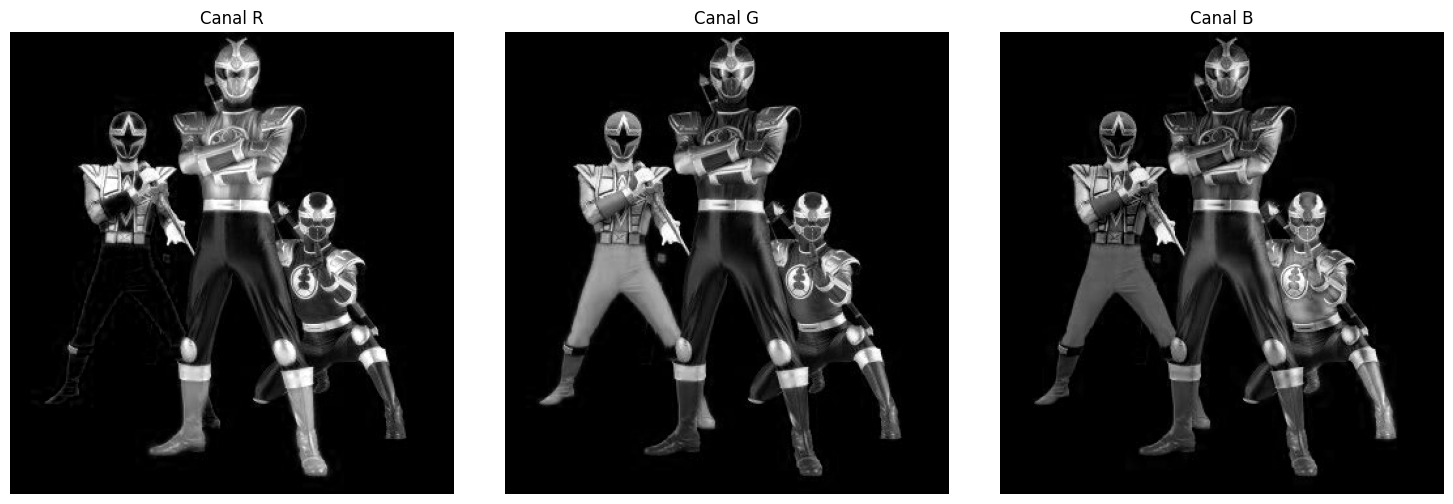

In [ ]:
# Separar os canais
r, g, b = image.split()

# Exibir os canais
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, channel, color in zip(axs, [r, g, b], ['R', 'G', 'B']):
    ax.imshow(channel, cmap='gray')
    ax.set_title(f'Canal {color}')
    ax.axis('off')
plt.tight_layout()
plt.show()


## Conversão para escala de cinza

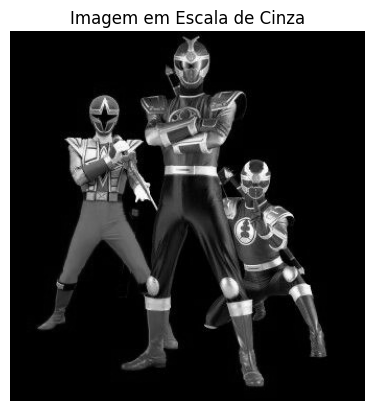

In [ ]:
# Converter para escala de cinza
gray_image = image.convert("L")

# Mostrar imagem em tons de cinza
plt.imshow(gray_image, cmap='gray')
plt.title("Imagem em Escala de Cinza")
plt.axis('off')
plt.show()


## Explorando os pixels

In [ ]:
# Converter para numpy e mostrar valor de alguns pixels
np_image = np.array(image)
print("Formato da imagem:", np_image.shape)
print("Valor do pixel (0, 0):", np_image[0, 0])


Formato da imagem: (354, 340, 3)
Valor do pixel (0, 0): [0 0 0]


## 🧠 Exercício

Tente modificar o código acima para:

- Exibir apenas o canal vermelho da imagem.
- Modifique aleatoriamente o canal vermelho e gere a imagem novamente.
- Criar uma imagem negativa (inverter as cores).
- Salvar uma nova imagem modificada no disco.
- Recorte um pedaço da imagem e salve em disco.

---
Cada um dos pontos do exercício deve ser uma célula separada!


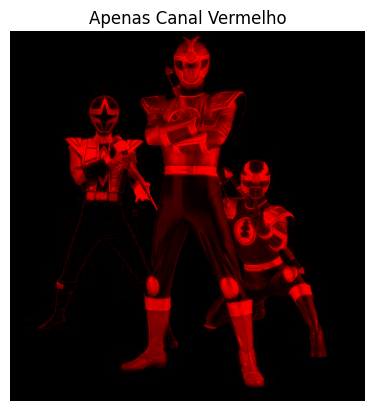

In [ ]:
np_image = np.array(image)

red_only = np.zeros_like(np_image)
red_only[:, :, 0] = np_image[:, :, 0]

plt.imshow(red_only)
plt.title("Só os vermelho")
plt.axis('off')
plt.show()

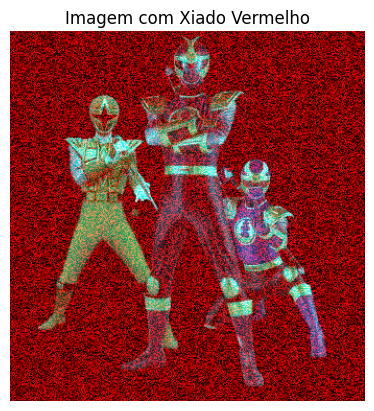

In [ ]:
np_r = np.array(r)
np.random.seed(42)
np_r_random = np.random.randint(0, 256, np_r.shape, dtype=np.uint8)

r_random = Image.fromarray(np_r_random)
modified_image = Image.merge("RGB", (r_random, g, b))

plt.imshow(modified_image)
plt.title("Imagem com Chiado Vermelho")
plt.axis('off')
plt.show()



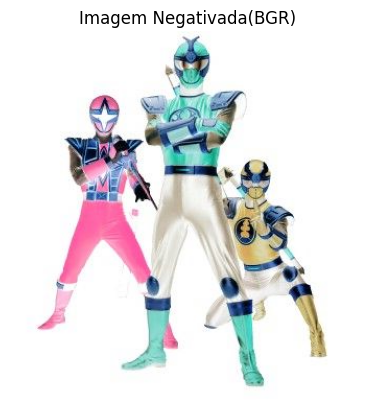

In [ ]:

np_image = np.array(image)
negative_image = 255 - np_image
negative_pil = Image.fromarray(negative_image)

plt.imshow(negative_pil)
plt.title("Imagem Negativada(BGR)")
plt.axis('off')
plt.show()


In [ ]:
negative_pil.save("Power_Ranger_RGB.png")

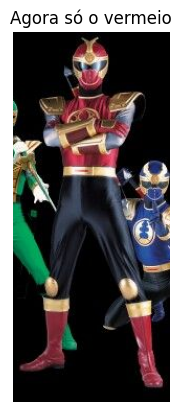

Recorte salvo como 'recorte.jpg'


In [ ]:
corta = image.crop((100, 0, 250, 354))

plt.imshow(corta)
plt.title("Agora só o vermeio")
plt.axis('off')
plt.show()

corta.save("recorte.jpg")
print("Recorte salvo como 'recorte.jpg'")